In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 머신러닝을 지원하는 sklearn 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표들을 활용할 수 있는 metrics 모듈을 불러오기
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split#학습 평가 데이터 분리
import seaborn as sns #matplot과 유사하게 시각화 라이브러리이지만 좀 더 깔끔함
from sklearn.datasets import load_iris #붓꽃 iris
from sklearn.tree import DecisionTreeClassifier #트리
# !pip install seaborn
# 손쉽게 레이블 인코딩을 하기 위해 레이블인코더를 임포트
from sklearn.preprocessing import LabelEncoder
#!pip install graphviz #시각화 외부라이브러리
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler #StandardScaler
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler
from sklearn.datasets import load_breast_cancer
#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 목차보기
from sklearn.model_selection import cross_val_score#교차검증 적용을 위해 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier #앙상블 모델
from sklearn.ensemble import AdaBoostClassifier # 에이다
#!pip install xgboost #XG부스트
#!pip install lightgbm #LightGBM
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# 빨간색 경고창 무시하기
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split #트레인테스트 스플릿
from sklearn.model_selection import GridSearchCV # 그리드서치
from sklearn.model_selection import KFold # cv = kfold
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression#선형회귀 모델 임포트
from sklearn.datasets import load_boston #학습용 보스턴 집 값 데이터를 임포트
from sklearn.metrics import mean_squared_error # mse
from sklearn.linear_model import Lasso # Lasso 임포트
from sklearn.linear_model import Ridge # Ridge 임포트
from sklearn.linear_model import LogisticRegression #로지스틱 임포트
# 한글을 쓰기 위한 코드
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

### 목표
- 보스턴에 있는 주택들의 데이터를 바탕으로 집 가격을 예측해보자!

### 데이터 수집
- 보스턴 집 값 데이터셋 로드

In [138]:
boston = load_boston()

In [139]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [140]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [141]:
# data : 문제 데이터
# target : 정답 데이터
# feature_names : 컬럼명(특성명)
# DESCR : feature_names에 대한 설명
# filename : 파일 경로 및 이름

In [142]:
boston["target"] # 정답이 실수로 되어있음

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

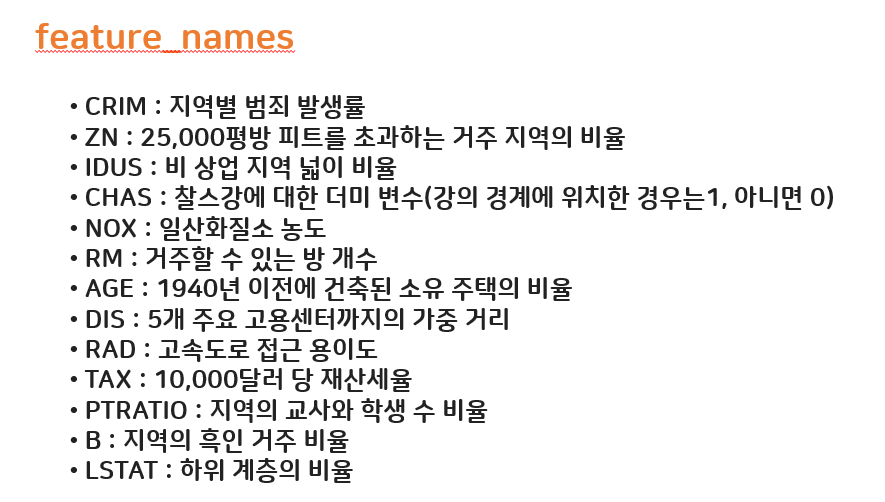

In [143]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 데이터 전처리
- 필요없음(학습용 데이터)

### 탐색적 데이터 분석
- 생략

### 모델링(선택, 학습, 평가)
- 문제, 정답 데이터 설정
- 학습, 평가 데이터 설정

In [144]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

In [145]:
dfX = pd.DataFrame(boston["data"], columns=boston["feature_names"])#boston_df
dfy = pd.DataFrame(boston["target"], columns=["price"])#boston["target"]

In [146]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [147]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [148]:
# 평가 ,정답데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy,
                                                    test_size = 0.3, #7 : 3
                                                    random_state = 5
                                                   )

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) # 데이터 프레임이라 1이라고 나옴

(354, 13)
(152, 13)
(354, 1)
(152, 1)


- 선형회귀 모델 적용

In [150]:
linear_md = LinearRegression()

In [151]:
linear_md.fit(X_train, y_train)

LinearRegression()

In [152]:
# 특성의 개수만큼 W값이 출력
linear_md.coef_ # 선형회귀 직선의 w값 확인

array([[-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,
         7.86055259e-01, -1.29365836e+01,  4.03952301e+00,
        -1.05354914e-02, -1.33498644e+00,  3.18272501e-01,
        -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
        -4.62052176e-01]])

In [153]:
linear_md.intercept_ # 선형회귀 직선의 b값(y절편) 확인

array([31.7303513])

- 모델 평가:MSE ,RMSE, R2스코어 확인

In [154]:
# 선형회귀 모델로 예측한 값을 변수에 저장
pre_train = linear_md.predict(X_train)
pre_test = linear_md.predict(X_test)

In [155]:
# train 데이터의 mse
train_mse = mean_squared_error(pre_train, y_train)
# test 데이터의 mse
test_mse = mean_squared_error(pre_test, y_test)

In [156]:
print("train 데이터 MSE : ", train_mse)
print("test 데이터 MSE : ", test_mse)
print("train, test의 MSE 차이 : ", test_mse - train_mse )
print("-"*50)
print("train 데이터 RMSE : ", train_mse**0.5)
print("test 데이터 RMSE : ", test_mse**0.5)
print("train, test의 RMSE 차이 : ", test_mse**0.5-train_mse**0.5)

train 데이터 MSE :  19.068341850927226
test 데이터 MSE :  30.69703770408852
train, test의 MSE 차이 :  11.628695853161293
--------------------------------------------------
train 데이터 RMSE :  4.366731254717563
test 데이터 RMSE :  5.540490745781327
train, test의 RMSE 차이 :  1.1737594910637634


In [157]:
# 정답 데이터(집 가격)의 평균 수치값을 확인해보자!
print("train데이터 주택 가격 평균 : ", y_train["price"].mean())
print("test데이터 주택 가격 평균 : ", y_test["price"].mean())

train데이터 주택 가격 평균 :  22.556214689265538
test데이터 주택 가격 평균 :  22.478289473684214


In [158]:
# train 데이터의 R2 스코어
linear_md.score(X_train, y_train)

0.7611598772034454

In [159]:
# test 데이터의 R2 스코어
linear_md.score(X_test, y_test)

0.67716969998517

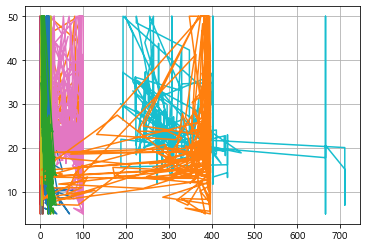

In [160]:
plt.plot(dfX, dfy)
plt.grid()
plt.show()

### 선형회귀 모델 특성확장
- 선형회귀는 특성이 적으면(모델이 간단하면) 다른 모델에 비해 성능이 낮게 나오기 때문에
특성확장을 사용해서 모델의 복잡도를 증가시켜보자
- 각 컬럼들의 데이터를 곱하여 새로운 특성으로 확장시켜보자잇!!

In [161]:
extended_X_train = X_train.copy()
# copy : 기존의 데이터는 그대로 두면서 새로운 변수명에 넣어주는 명령
# copy 없이 X_train을 새로운 변수에 담아준다면 변수의 내용이 바뀌면 X_train도 바뀌게 됨

In [162]:
# copy 를 쓰는 이유!!!!!
a = [1, 2, 3]
b= a
b[0] = 2
a

[2, 2, 3]

In [163]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [164]:
# extended_X_train의 각 컬럼들을 서로서로 한번씩 곱해서 새로운 컬럼을 추가해주기
for col1 in X_train.columns:     # 13번 반복
    for col2 in X_train.columns: # 13번 반복
        extended_X_train[col1+"x"+col2] = X_train[col1] * X_train[col2]

In [165]:
pd.set_option("display.max_columns", None)

In [166]:
extended_X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIMxCRIM,CRIMxZN,CRIMxINDUS,CRIMxCHAS,CRIMxNOX,CRIMxRM,CRIMxAGE,CRIMxDIS,CRIMxRAD,CRIMxTAX,CRIMxPTRATIO,CRIMxB,CRIMxLSTAT,ZNxCRIM,ZNxZN,ZNxINDUS,ZNxCHAS,ZNxNOX,ZNxRM,ZNxAGE,ZNxDIS,ZNxRAD,ZNxTAX,ZNxPTRATIO,ZNxB,ZNxLSTAT,INDUSxCRIM,INDUSxZN,INDUSxINDUS,INDUSxCHAS,INDUSxNOX,INDUSxRM,INDUSxAGE,INDUSxDIS,INDUSxRAD,INDUSxTAX,INDUSxPTRATIO,INDUSxB,INDUSxLSTAT,CHASxCRIM,CHASxZN,CHASxINDUS,CHASxCHAS,CHASxNOX,CHASxRM,CHASxAGE,CHASxDIS,CHASxRAD,CHASxTAX,CHASxPTRATIO,CHASxB,CHASxLSTAT,NOXxCRIM,NOXxZN,NOXxINDUS,NOXxCHAS,NOXxNOX,NOXxRM,NOXxAGE,NOXxDIS,NOXxRAD,NOXxTAX,NOXxPTRATIO,NOXxB,NOXxLSTAT,RMxCRIM,RMxZN,RMxINDUS,RMxCHAS,RMxNOX,RMxRM,RMxAGE,RMxDIS,RMxRAD,RMxTAX,RMxPTRATIO,RMxB,RMxLSTAT,AGExCRIM,AGExZN,AGExINDUS,AGExCHAS,AGExNOX,AGExRM,AGExAGE,AGExDIS,AGExRAD,AGExTAX,AGExPTRATIO,AGExB,AGExLSTAT,DISxCRIM,DISxZN,DISxINDUS,DISxCHAS,DISxNOX,DISxRM,DISxAGE,DISxDIS,DISxRAD,DISxTAX,DISxPTRATIO,DISxB,DISxLSTAT,RADxCRIM,RADxZN,RADxINDUS,RADxCHAS,RADxNOX,RADxRM,RADxAGE,RADxDIS,RADxRAD,RADxTAX,RADxPTRATIO,RADxB,RADxLSTAT,TAXxCRIM,TAXxZN,TAXxINDUS,TAXxCHAS,TAXxNOX,TAXxRM,TAXxAGE,TAXxDIS,TAXxRAD,TAXxTAX,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxCRIM,PTRATIOxZN,PTRATIOxINDUS,PTRATIOxCHAS,PTRATIOxNOX,PTRATIOxRM,PTRATIOxAGE,PTRATIOxDIS,PTRATIOxRAD,PTRATIOxTAX,PTRATIOxPTRATIO,PTRATIOxB,PTRATIOxLSTAT,BxCRIM,BxZN,BxINDUS,BxCHAS,BxNOX,BxRM,BxAGE,BxDIS,BxRAD,BxTAX,BxPTRATIO,BxB,BxLSTAT,LSTATxCRIM,LSTATxZN,LSTATxINDUS,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98,113.887315,0.0000,193.159580,0.0,7.897132,68.929156,1011.686640,21.214471,256.12320,7107.41880,215.570360,459.527708,255.909764,0.0000,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,193.159580,0.0,327.6100,0.0,13.39400,116.90790,1715.880,35.980990,434.40,12054.60,365.620,779.3860,434.0380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.897132,0.00,13.39400,0.0,0.547600,4.779660,70.1520,1.471046,17.760,492.840,14.9480,31.86440,17.74520,68.929156,0.00,116.90790,0.0,4.779660,41.718681,612.3132,12.839846,155.016,4301.694,130.4718,278.12454,154.88682,1011.686640,0.0,1715.880,0.0,70.1520,612.3132,8987.04,188.45292,2275.2,63136.8,1914.96,4082.088,2273.304,21.214471,0.000,35.980990,0.0,1.471046,12.839846,188.45292,3.951746,47.7096,1323.9414,40.15558,85.598974,47.669842,256.12320,0.0,434.40,0.0,17.760,155.016,2275.2,47.7096,576.0,15984.0,484.8,1033.44,575.52,7107.41880,0.0,12054.60,0.0,492.840,4301.694,63136.8,1323.9414,15984.0,443556.0,13453.2,28677.96,15970.68,215.570360,0.0,365.620,0.0,14.9480,130.4718,1914.96,40.15558,484.8,13453.2,408.04,869.812,484.396,459.527708,0.0,779.3860,0.0,31.86440,278.12454,4082.088,85.598974,1033.44,28677.96,869.812,1854.1636,1032.5788,255.909764,0.0,434.0380,0.0,17.74520,154.88682,2273.304,47.669842,575.52,15970.68,484.396,1032.5788,575.0404
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,54.274310,0.0000,133.344691,0.0,5.002268,45.624512,575.371291,14.259778,176.81064,4906.49526,148.815622,712.620550,158.540207,0.0000,0.0,0.0,0.0,0.00,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,133.344691,0.0,327.6100,0.0,12.28990,112.09330,1413.610,35.034360,434.40,12054.60,365.620,1750.8130,389.5120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.002268,0.00,12.28990,0.0,0.461041,4.205047,53.0299,1.314272,16.296,452.214,13.7158,65.67967,14.61208,45.624512,0.00,112.09330,0.0,4.205047,38.353249,483.6733,11.987171,148.632,4124.538,125.0986,599.04889,133.27336,575.371291,0.0,1413.610,0.0,53.0299,483.6733,6099.61,151.17036,1874.4,52014.6,1577.62,7554.613,1680.712,14.259778,0.000,35.034360,0.0,1.314272,11.987171,151.17036,3.746547,46.4544,1289.1096,39.09912,187.230588,41.654112,176.81064,0.0,434.40,0.0,16.296,148.632,1874.4,46.4544,576.0,15984.0,484.8,2321.52,516.48,4906.49526,0.0,12054.60,0.0,452.214,4124.538,52014.6,1289.1096,15984.0,443556.0,13453.2,64422.18,14332.32,1

In [167]:
X_train.shape

(354, 13)

In [168]:
extended_X_train.shape

(354, 182)

In [169]:
# 특성확장된 train 데이터의 문제와 정답으로 학습시키기
linear_md2 = LinearRegression()
linear_md2.fit(extended_X_train, y_train)

LinearRegression()

In [170]:
extended_X_test = X_test.copy()

In [171]:
# extended_X_test의 각 컬럼들을 서로서로 한번씩 곱해서 새로운 컬럼을 추가해주기
for col1 in X_test.columns:     # 13번 반복
    for col2 in X_test.columns: # 13번 반복
        extended_X_test[col1+"x"+col2] = X_test[col1] * X_test[col2]

In [172]:
extended_X_test.shape

(152, 182)

In [173]:
ex_pre_train = linear_md2.predict(extended_X_train)
ex_pre_test = linear_md2.predict(extended_X_test)

In [174]:
# train 데이터의 mse(평균제곱오차) = 예측값 - 정답값
ex_train_mse = mean_squared_error(ex_pre_train, y_train)
# test 데이터의 mse
ex_test_mse = mean_squared_error(ex_pre_test, y_test)

In [175]:
print("특성확장train 데이터 MSE : ", ex_train_mse)
print("특성확장test 데이터 MSE : ", ex_test_mse)
print("특성확장train, test의 MSE 차이 : ", ex_test_mse - ex_train_mse )
print("-"*50)
print("특성확장train 데이터 RMSE : ", ex_train_mse**0.5)
print("특성확장test 데이터 RMSE : ", ex_test_mse**0.5)
print("특성확장train, test의 RMSE 차이 : ", ex_test_mse**0.5 - ex_train_mse**0.5)

특성확장train 데이터 MSE :  5.329363416561545
특성확장test 데이터 MSE :  18.12803010569276
특성확장train, test의 MSE 차이 :  12.798666689131213
--------------------------------------------------
특성확장train 데이터 RMSE :  2.3085414045586328
특성확장test 데이터 RMSE :  4.257702444475513
특성확장train, test의 RMSE 차이 :  1.9491610399168806


In [176]:
linear_md2.score(extended_X_train, y_train)

0.9332471683804467

In [177]:
linear_md2.score(extended_X_test, y_test)

0.8093536759438125

- 과대적합을 해소하기 위해서 규제모델을 적용해보자!

### 라쏘(Lasso)모델 적용

In [178]:
lasso_md = Lasso(alpha=10)
# alpha값이 높아지면 과대적합이 줄어들지만 오차는 커질 수 있음.

In [179]:
lasso_md.fit(extended_X_train, y_train)

Lasso(alpha=10)

In [180]:
print(f"사용한 특성의 수 : {np.sum(lasso_md.coef_ != 0)}")

사용한 특성의 수 : 49


In [181]:
print(f"사용한 특성의 수 : {np.sum(lasso_md.intercept_ != 0)}")

사용한 특성의 수 : 1


In [182]:
pre_train_lasso = lasso_md.predict(extended_X_train)
pre_test_lasso = lasso_md.predict(extended_X_test)

In [183]:
# train 데이터의 mse(평균제곱오차) = 예측값 - 정답값
train_mse_la = mean_squared_error(pre_train_lasso, y_train)
# test 데이터의 mse
test_mse_la = mean_squared_error(pre_test_lasso, y_test)
print("특성확장train 데이터 MSE : ", train_mse_la)
print("특성확장test 데이터 MSE : ", test_mse_la)
print("특성확장train, test의 MSE 차이 : ", test_mse_la - train_mse_la )
print("-"*50)
print("특성확장train 데이터 RMSE : ", train_mse_la**0.5)
print("특성확장test 데이터 RMSE : ", test_mse_la**0.5)
print("특성확장train, test의 RMSE 차이 : ", test_mse_la**0.5 - train_mse_la**0.5)

특성확장train 데이터 MSE :  11.772124825717558
특성확장test 데이터 MSE :  17.91779281740544
특성확장train, test의 MSE 차이 :  6.145667991687883
--------------------------------------------------
특성확장train 데이터 RMSE :  3.4310530199513907
특성확장test 데이터 RMSE :  4.232941390735931
특성확장train, test의 RMSE 차이 :  0.8018883707845403


In [184]:
#R2스코어
lasso_md.score(extended_X_train, y_train)

0.8525484931552121

In [185]:
lasso_md.score(extended_X_test, y_test)

0.8115646699656578

- 선형회귀 모델에 비해 과대적합이 줄어든 것을 확인할 수 있음

### 릿지(Ridge)모델 적용

In [186]:
ridge_md = Ridge(alpha=10)

In [187]:
ridge_md.fit(extended_X_train, y_train)

Ridge(alpha=10)

In [188]:
pre_train_ridge = ridge_md.predict(extended_X_train)
pre_test_ridge = ridge_md.predict(extended_X_test)

In [189]:
# train 데이터의 mse(평균제곱오차) = 예측값 - 정답값
train_mse_ri = mean_squared_error(pre_train_ridge, y_train)
# test 데이터의 mse
test_mse_ri = mean_squared_error(pre_test_ridge, y_test)
print("특성확장train 데이터 MSE : ", train_mse_ri)
print("특성확장test 데이터 MSE : ", test_mse_ri)
print("특성확장train, test의 MSE 차이 : ", test_mse_ri - train_mse_ri )
print("-"*50)
print("특성확장train 데이터 RMSE : ", train_mse_ri**0.5)
print("특성확장test 데이터 RMSE : ", test_mse_ri**0.5)
print("특성확장train, test의 RMSE 차이 : ", test_mse_ri**0.5 - train_mse_ri**0.5)

특성확장train 데이터 MSE :  6.430744469502569
특성확장test 데이터 MSE :  15.363594941038443
특성확장train, test의 MSE 차이 :  8.932850471535874
--------------------------------------------------
특성확장train 데이터 RMSE :  2.5358912574285535
특성확장test 데이터 RMSE :  3.919642195537552
특성확장train, test의 RMSE 차이 :  1.3837509381089985


In [190]:
#R2스코어
ridge_md.score(extended_X_train, y_train)

0.9194518427046885

In [191]:
ridge_md.score(extended_X_test, y_test)

0.8384262998946909

- alpha값이 10일때는 릿지모델에 비해 라쏘모델이 과대적합을 해소하는데 더 유리하다

In [192]:
# Lasso모델
# alpha값에 따라 RMSE 계산값을 빈 리스트에 하나씩 담아두기!
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
lasso_train_list = []  #train데이터의 RMSE 값을 담아줄 빈 리스트
lasso_test_list = []   #test데이터의 RMSE 값을 담아줄 빈 리스트

for i in alpha_list :
    # alpha값을 바꿔가며 모델 생성
    lasso_md = Lasso(alpha = i)
     #모델 학습
    lasso_md.fit(extended_X_train, y_train)
    
    #train
    #모델 예측
    lasso_train_pre = lasso_md.predict(extended_X_train)
    #RMSE 구하기
    lasso_train_RMSE = mean_squared_error(lasso_train_pre, y_train)**0.5
    #구한 RMSE를 빈 리스트에 차례로 넣어주기
    lasso_train_list.append(lasso_train_RMSE)
    
    #test
    lasso_test_pre = lasso_md.predict(extended_X_test)
    lasso_test_RMSE = mean_squared_error(lasso_test_pre, y_test)**0.5
    lasso_test_list.append(lasso_test_RMSE)

In [193]:
lasso_test_list

[4.221458972433112,
 4.243935779449194,
 3.8032211559519307,
 4.232941390735931,
 5.188098568923207,
 6.409164606921208]

In [194]:
lasso_train_list

[2.5074101228840613,
 2.5518594174521247,
 2.8090648633104824,
 3.4310530199513907,
 4.072947845655064,
 5.446757079334986]

In [195]:
# 한글을 쓰기 위한 코드
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

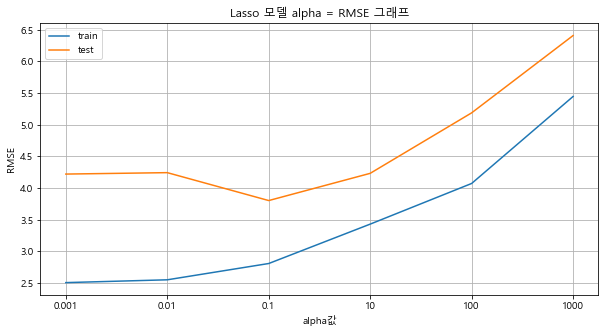

In [196]:
plt.figure(figsize=(10,5))
plt.plot(lasso_train_list, label="train") # train 그래프
plt.plot(lasso_test_list, label="test")   # test  그래프
plt.title("Lasso 모델 alpha = RMSE 그래프") # 그래프 제목
plt.xlabel("alpha값")
plt.xticks(np.arange(6), alpha_list)      # x축 값 설정(x축 값의 개수, 바꿔줄 값)
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()

In [197]:
# Ridge 모델 그래프로 스스로 만들기!
# Ridge모델
# alpha값에 따라 RMSE 계산값을 빈 리스트에 하나씩 담아두기!
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
ridge_train_list = []  #train데이터의 RMSE 값을 담아줄 빈 리스트
ridge_test_list = []   #test데이터의 RMSE 값을 담아줄 빈 리스트

for i in alpha_list :
    # alpha값을 바꿔가며 모델 생성
    ridge_md = Ridge(alpha = i)
     #모델 학습
    ridge_md.fit(extended_X_train, y_train)
    
    #train
    #모델 예측
    ridge_train_pre = ridge_md.predict(extended_X_train)
    #RMSE 구하기
    ridge_train_RMSE = mean_squared_error(ridge_train_pre, y_train)**0.5
    #구한 RMSE를 빈 리스트에 차례로 넣어주기
    ridge_train_list.append(ridge_train_RMSE)
    
    #test
    ridge_test_pre = ridge_md.predict(extended_X_test)
    ridge_test_RMSE = mean_squared_error(ridge_test_pre, y_test)**0.5
    ridge_test_list.append(ridge_test_RMSE)

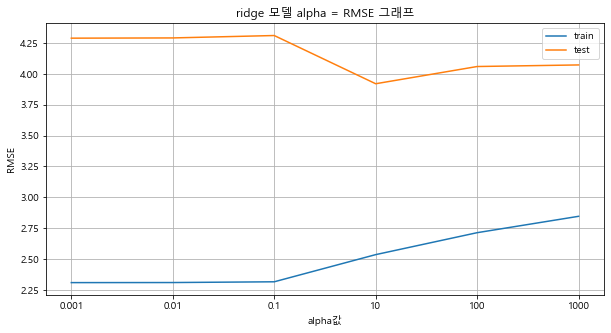

In [198]:
plt.figure(figsize=(10,5))
plt.plot(ridge_train_list, label="train") # train 그래프
plt.plot(ridge_test_list, label="test")   # test  그래프
plt.title("ridge 모델 alpha = RMSE 그래프") # 그래프 제목
plt.xlabel("alpha값")
plt.xticks(np.arange(6), alpha_list)      # x축 값 설정(x축 값의 개수, 바꿔줄 값)
plt.ylabel("RMSE")
plt.grid()
plt.legend()
plt.show()